In [1]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import ipdb
import re
import csv
import umap

import matplotlib.pyplot as plt
# import mplcursors
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize':(14,10)}, font_scale=2)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set random seeds for reproducibility on a specific machine
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

RandomState(MT19937) at 0x7FD0098D8240

In [2]:
layer=8
reps_folder = '../reps_diff/'

# Load the representations
reps = np.load(reps_folder + 'acts_layer_' + str(layer) + '_seed_1.npy')   

# Load dialect values and map to AAE, SAE
dialect = np.load(reps_folder + '/dialect_seed_1.npy')
dialect = [int(x[0]) for x in dialect.tolist()]
legend_map = {0: 'SAE', 1: 'AAE'}
dialect = [legend_map[x] for x in dialect]

reps.shape, len(dialect)

((18318, 768), 18318)

In [3]:
# UMAP parameters
n_neighbors = 15
min_dist = 0.1
n_components = 2
metric = 'euclidean'

reducer = umap.UMAP(n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    n_components=n_components,
                    metric=metric,
                    verbose=True,
                    random_state=1)
embedding = reducer.fit_transform(reps)

UMAP(random_state=1, verbose=True)
Tue Jan 31 14:59:36 2023 Construct fuzzy simplicial set
Tue Jan 31 14:59:36 2023 Finding Nearest Neighbors
Tue Jan 31 14:59:36 2023 Building RP forest with 12 trees


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Tue Jan 31 14:59:36 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Tue Jan 31 14:59:43 2023 Finished Nearest Neighbor Search
Tue Jan 31 14:59:45 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Tue Jan 31 14:59:57 2023 Finished embedding


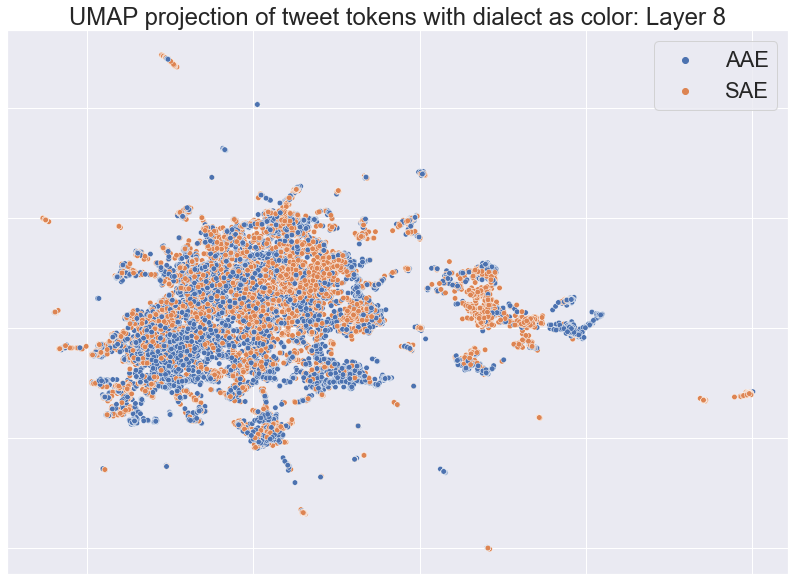

In [4]:
# %matplotlib notebook
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=dialect, s=30)
plt.title(f'UMAP projection of tweet tokens with dialect as color: Layer {layer}')

ax.set_xlabel('')
ax.set_ylabel('')

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])
    
plt.legend()
# plt.savefig(f'UMAP-Layer-{layer}', transparent=True)